<a href="https://colab.research.google.com/github/Lokesh1821/Titanic-Survival-Prediction/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#Uploading the dataset

df=pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
#getting the top 5 data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#getting the Bottom 5 elements

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#Getting the Random data

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q


In [8]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
#Describing the entire dataset

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#display the column names from the data

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#Datatypes present in the data
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [15]:
#total number of Columns and Rows

print("The total Number of Columns are: {}".format(df.shape[1]))
print("The total Number of Rows are: {}".format(df.shape[0]))

The total Number of Columns are: 12
The total Number of Rows are: 891


In [16]:
#getting the sum of null values rom each column

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [18]:
#Finding the Duplicated values

df.duplicated().sum() #No duplicate values in the dataset

np.int64(0)

In [20]:
#RETURN THE DATA WITHOUT DUPLICATE VALUES AND THE ORIGINAL DATA DOES NOT CHANGE

df.drop_duplicates(inplace=True)

In [22]:
#RETURN THE DATA WITHOUT DUPLICATE VALUES AND THE ORIGINAL DATA DOES NOT CHANGE

df.drop_duplicates(inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
# Droping the unnecessary columns
print(df.columns)

df.drop(['PassengerId', 'Pclass', 'Parch','Embarked', 'SibSp' ], axis=1, inplace=False)


Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


,Survived,Sex,Fare
0,0,male,7.2500
1,1,female,71.2833
2,1,female,7.9250
3,1,female,53.1000
4,0,male,8.0500
...,...,...,...
886,0,male,13.0000
887,1,female,30.0000
888,0,female,23.4500
889,1,male,30.0000


In [23]:
df['Survived'].value_counts()  # 0 stands for not_survived
                               # 1 stands for Survived

,count
Survived,
0,549
1,342


In [65]:
# splitinng the data

x=df.drop(columns='Survived',axis=1)
y=df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x) #display the data after removing the Survived column

     PassengerId  Pclass     Sex  SibSp  Parch     Fare Embarked
0              1       3    male      1      0   7.2500        S
1              2       1  female      1      0  71.2833        C
2              3       3  female      0      0   7.9250        S
3              4       1  female      1      0  53.1000        S
4              5       3    male      0      0   8.0500        S
..           ...     ...     ...    ...    ...      ...      ...
886          887       2    male      0      0  13.0000        S
887          888       1  female      0      0  30.0000        S
888          889       3  female      1      2  23.4500        S
889          890       1    male      0      0  30.0000        C
890          891       3    male      0      0   7.7500        Q

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [66]:
print(y) #printing the data passengerid and Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [68]:
print(x_train, x_test, y_train, y_test)  # printing the data after training and testing the data

     PassengerId  Pclass     Sex  SibSp  Parch      Fare Embarked
331          332       1    male      0      0   28.5000        S
733          734       2    male      0      0   13.0000        S
382          383       3    male      0      0    7.9250        S
704          705       3    male      1      0    7.8542        S
813          814       3  female      4      2   31.2750        S
..           ...     ...     ...    ...    ...       ...      ...
106          107       3  female      0      0    7.6500        S
270          271       1    male      0      0   31.0000        S
860          861       3    male      2      0   14.1083        S
435          436       1  female      1      2  120.0000        S
102          103       1    male      0      1   77.2875        S

[712 rows x 7 columns]      PassengerId  Pclass     Sex  SibSp  Parch     Fare Embarked
709          710       3    male      1      1  15.2458        C
439          440       2    male      0      0  10.500

In [78]:
print("printing the number of rows and columns after the train: ", x_train.shape)

print("printing the number of rows columns after the test: ", x_test.shape)

print("printing the number of rows after the train: ", y_train.shape)

print("printing the number of rows after the test: ", y_test.shape)


printing the number of rows and columns after the train:  (712, 7)
printing the number of rows columns after the test:  (179, 7)
printing the number of rows after the train:  (712,)
printing the number of rows after the test:  (179,)


<Axes: xlabel='Survived', ylabel='count'>

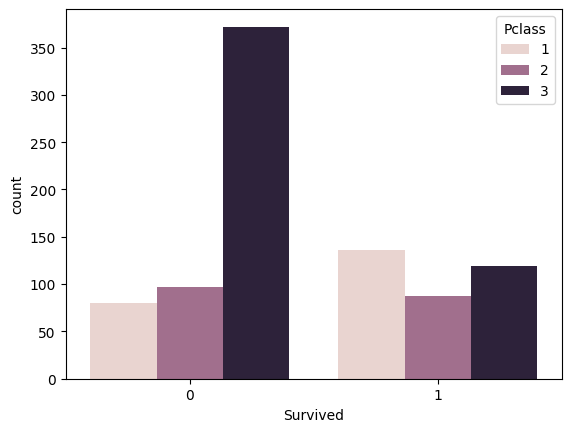

In [28]:

sns.countplot(x=df["Survived"], hue=df['Pclass'])

In [31]:
df['Sex']  #converted the string data into the numerical

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


<Axes: xlabel='Sex', ylabel='count'>

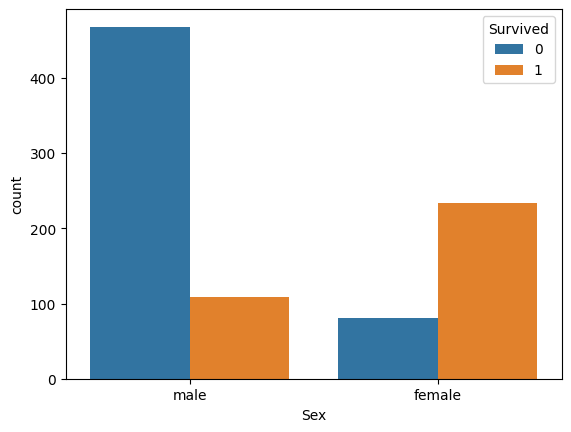

In [36]:
#graph to visualize the count of survivals with respect to gender

sns.countplot(x=df['Sex'], hue=df['Survived'])

In [89]:
from sklearn.ensemble import RandomForestClassifier

model= RandomForestClassifier(n_estimators=100, random_state=42)




In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
model.fit(x_train, y_train)   # Train the model
y_pred = model.predict(x_test)  # predictinon



print("The Accuracy is",(accuracy_score(y_test, y_pred))*100) # Accuracy of the getting the data

The Accuracy is 81.56424581005587


In [107]:
print("Classification Report:", classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [110]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

Confusion Matrix: [[91 14]
 [19 55]]


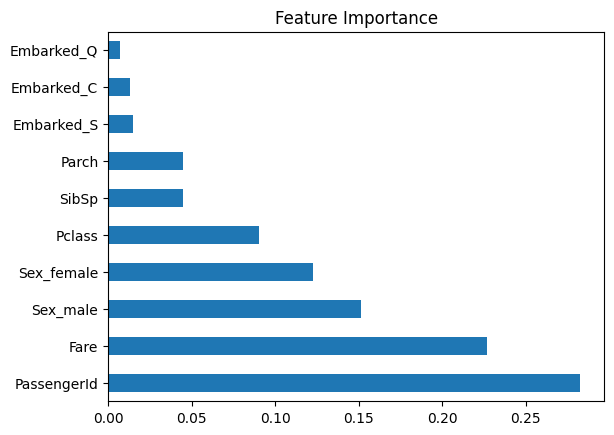

In [113]:
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance")
plt.show()